START NOTEBOOK

# Model Description

A dissipation model was developed at the microcosm scale to estimate pesticide component dissipation in top-soil, i.e. degradation and leaching during infiltration. Partitioning between rainfall and runoff was determined using the Green-Ampt method (Green and Ampt, 1911; Mein and Larson, 1973). This simplification of the Richards equation (Richards, 1931) simulates overland flow when rainfall intensity overcomes the soil infiltration capacity. The retention and release of pesticide components in the top-soil was conceptualized using a mixing layer model (McGrath et al., 2008; Joyce et al., 2010). This approach assumes linear equilibrium sorption and adapts McGrath et al. (2008) by directly accounting for the leached volume such that:

$$ C(t+t_r) = C(t) \cdot exp\big( \frac{-V_{lch}}{ R~V_{H_2O} } \big) $$

$$ V_{lch} = h_{lch} \pi r^2 $$

$$ V_{H_2O} = \pi \cdot r^2 \cdot zl \cdot \theta_{sat} $$

$$ R = 1 + \frac{\rho_b K_d}{\theta_{sat}} $$

where $C$ is the concentration before $(t)$ and after $(t+ t_r)$ the leaching event, $(h_{lch})~[cm]$ is leached depth, $r~[cm]$ is the microcosm radius, $zl ~[cm]$ is the soil height and $\theta_{sat} ~ [cm^3 cm^{-3}]$ the constant volumetric water content (saturated capacity).



## Experimental set-up 

### Rainfal intensities

In [1]:
intensities = [2.25, 0.92, 0.5]  # mm/min = [0.225, 0.092, 0.05] cm/min

### Microcosm

In [2]:
d = (14.93 * 2)  # Diameter of falcon tube (mm)
area = ((d / 2) ** 2) * 3.1416  # (mm2)
zl = soil_height = 30  # Mixing layer depth in mm

### Soil Characteristics

In [3]:
''' Hydrological controlling parameters'''
# Alteck (Martine Trautmann, sampled pre-event)
porosity_crop = 0.61  # Crop soil
kSat_crop = 2.24  # mm/min (13.45 cm/h - Crop Soil)
kSat_crop2 = kSat_crop/100 
ov_1 = 0.25   # Initial water content m3. m-3
ov_2 = 0.20   # Initial water content m3. m-3
ovSat_crop = 0.45  # Saturated water content (assumed)
psi_crop = 1100  # soil suction Alteck (mm)
psi_crop2 = 617.0  # soil suction Alteck (mm)
#  (Lefrancq, 2014: 61.7 cm , p.160; 110 cm, p.189)
soil_height1= 30  # mm

# Results

## Hydrology

In [4]:
from hydroplots import *
from leach_hydrology import *
import numpy as np

# Plot graphs within this document
%matplotlib inline 
import mpld3
mpld3.enable_notebook()

# Plot graphs outside (for interaction)
# %matplotlib

### Hydrology - Annual Crop Soil (1st pulse)

In [5]:
water_data = leachsim(ovSat=ovSat_crop,
                      kSat=kSat_crop,
                      psi=psi_crop,
                      soil_height=soil_height1)

# Time
cum_time_30min = water_data[:, 0]

# Cummulative infiltration
cum_inf_135mmh = water_data[:, 4]
cum_inf_55mmh = water_data[:, 5] 
cum_inf_30mmh = water_data[:, 6] 

# Cummulative leaching
cum_leach_135mmh = water_data[:, 7]
cum_leach_55mmh = water_data[:, 8]
cum_leach_30mmh = water_data[:, 9]

# Ponding
roff_135mmh = water_data[:, 10]
roff_55mmh = water_data[:, 11]
roff_30mmh = water_data[:, 12]

# Cummulative ponding
cum_roff_135mmh = water_data[:, 13]
cum_roff_55mmh = water_data[:, 14]
cum_roff_30mmh = water_data[:, 15]

infil_135mmh = water_data[:, 16]
infil_55mmh = water_data[:, 17]
infil_30mmh = water_data[:, 18]

percol_data1 = stackdata3(cum_time_30min,
                          cum_leach_135mmh, cum_leach_55mmh, cum_leach_30mmh)

runoff_data1 = stackdata3(cum_time_30min,
                          cum_roff_135mmh, cum_roff_55mmh, cum_roff_30mmh)

infil_data1 = stackdata3(cum_time_30min,
                         infil_135mmh, infil_55mmh, infil_30mmh)

time_size_135mmh = water_data[:, 19]
time_size_55mmh = water_data[:, 20]
time_size_30mmh = water_data[:, 21]

time_sizes1 = [time_size_135mmh, time_size_55mmh, time_size_30mmh]

""" Observed Hydrlogy Annual Crop """
# all at 6 min, high inetnesity
leach_high_6min = np.array([16.253, 12.958, 17.536, 14.29])  

# all at 12 min, med intensity
leach_med_12min = np.array([10.089, 5.902, 13.981, 10.602]) 

# all at 30min, med intensity
leach_med_30min = np.array([49.197, 40.402, 45.772, 47.201])  

# all at 30min, low intensity
leach_low_30min = np.array([20.037, 17.508, 22.376, 20.085])  


Mass balance 0.0
Mass balance 0.0
Mass balance 0.0


### Percolation Crop (1st pulse)

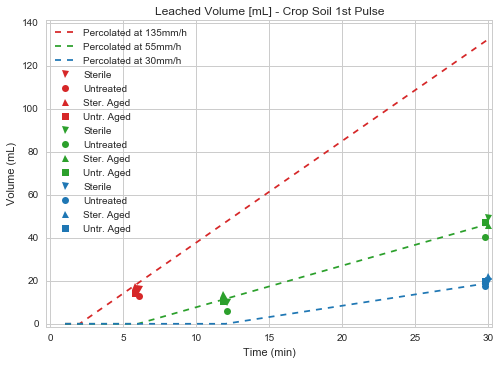

In [6]:
hydroplot(percol_data1, 
          "Percolated at 135mm/h", "Percolated at 55mm/h", "Percolated at 30mm/h",
          leach_high_6min, 
          leach_med_12min, leach_med_30min, 
          leach_low_30min,
         "Leached Volume [mL] - Crop Soil 1st Pulse")

### Hydrology - Annual Crop Soil (2nd pulse)

In [7]:
''' Hydrological controlling parameters'''
# Alteck (Martine Trautmann, sampled pre-event)
porosity_crop = 0.61  # Crop soil
kSat_crop2 = kSat_crop/100 
ov_2 = 0.40  # Initial water content m3. m-3
psi_crop = 1100  # soil suction Alteck mm
psi_cropB = 617  # soil suction Alteck mm
#  (Lefrancq, 2014: 61.7 cm , p.160; 110 cm, p.189)
soil_height2 = 23  # mm

In [8]:
water_data2 = leachsim(dtGA = 1,
                       ov=ov_2,
                       ovSat=ovSat_crop,
                       kSat=kSat_crop2,
                       psi=psi_crop,
                       soil_height=soil_height2)

G&A ponding during time step, with tp size: 0.2458051515332894 at t= 1.0
Mass balance 0.0
G&A ponding during time step, with tp size: 0.49190110826939415 at t= 2.0
Mass balance 2.9103830456733704e-11
G&A ponding during time step, with tp size: 0.15912897822445426 at t= 6.0
Mass balance -3.637978807091713e-12


**Extract hydrological time-series (volumes are in $mm^3$)**

In [9]:
# Time axis
cum_time_30min = water_data2[:, 0]

# Cumulative infiltration
cum_inf_135mmh = water_data2[:, 4]
cum_inf_55mmh = water_data2[:, 5]
cum_inf_30mmh = water_data2[:, 6]

# Cumulative leachate
cum_leach_135mmh = water_data2[:, 7]
cum_leach_55mmh = water_data2[:, 8]
cum_leach_30mmh = water_data2[:, 9]

# Ponding
roff_135mmh = water_data2[:, 10]
roff_55mmh = water_data2[:, 11]
roff_30mmh = water_data2[:, 12]

# Cummulative ponding
cum_roff_135mmh = water_data2[:, 13]
cum_roff_55mmh = water_data2[:, 14]
cum_roff_30mmh = water_data2[:, 15]

# Infiltration
infil_135mmh = water_data2[:, 16]
infil_55mmh = water_data2[:, 17]
infil_30mmh = water_data2[:, 18]

# Group each compartment for graphing
percol_data2 = stackdata3(cum_time_30min,
                          cum_leach_135mmh, cum_leach_55mmh, cum_leach_30mmh)

runoff_data2 = stackdata3(cum_time_30min,
                          cum_roff_135mmh, cum_roff_55mmh, cum_roff_30mmh)


infil_data2 = stackdata3(cum_time_30min,
                         infil_135mmh, infil_55mmh, infil_30mmh)

time_size_135mmh = water_data2[:, 19]
time_size_55mmh = water_data2[:, 20]
time_size_30mmh = water_data2[:, 21]

time_sizes2 = [time_size_135mmh, time_size_55mmh, time_size_30mmh]

### Percolation Crop (2nd pulse)

**Observed Percolation Annual Crop - 2nd pulse**

In [10]:
# Order if array is:
#  [sterile, untreat, sterile_aged, untreat_aged]

# At 6 min, high inetnesity
leach_high_6min = np.array([14.192, 8.245, 2.410, 5.469]) 

# At 12 min, med intensity
leach_med_12min = np.array([18.672, 19.0, 0.830, 11.407]) 

# At 30min, med intensity
leach_med_30min = np.array([12.697, 2.473, 3.52, 20.291])  

# At 30min, low intensity
leach_low_30min = np.array([29.656, 9.375, 0.409, 3.385]) 

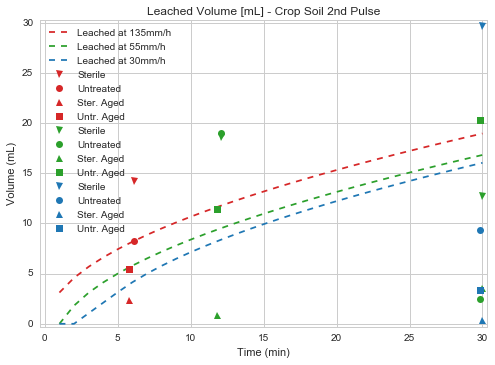

In [11]:
hydroplot(percol_data2, 
          "Leached at 135mm/h", "Leached at 55mm/h", "Leached at 30mm/h",
          leach_high_6min, 
          leach_med_12min, leach_med_30min, 
          leach_low_30min,
         "Leached Volume [mL] - Crop Soil 2nd Pulse")

### Ponding Crop (2nd pulse only)

**Observed Ponding Annual Crop - 2nd pulse**

In [12]:
# [sterile, untreat, sterile_aged, untreat_aged]
# all at 6 min, high inetnesity
roff_high_6min = np.array([10.824, 20.935, 24.75, 19.041])  

# all at 12 min, med intensity
roff_med_12min = np.array([0, 3.907, 19.436, 7.313]) 

# all at 30min, med intensity
roff_med_30min = np.array([43.764, 28.911, 51.964, 33.478])  

# all at 30min, low intensity
roff_low_30min = np.array([0, 22.618, 28.598, 27.314])  


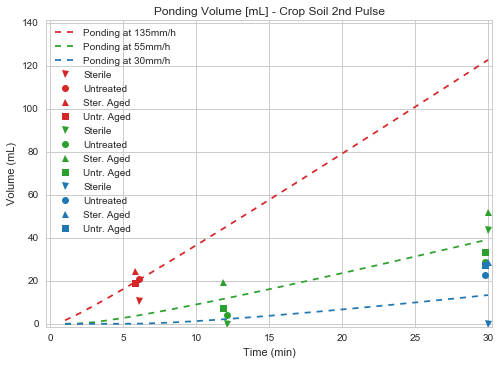

In [13]:
# Plot ponding simulations from second pulse.
hydroplot(runoff_data2, 
          "Ponding at 135mm/h", "Ponding at 55mm/h", "Ponding at 30mm/h",
          roff_high_6min, 
          roff_med_12min, roff_med_30min, 
          roff_low_30min,
         "Ponding Volume [mL] - Crop Soil 2nd Pulse")

# Contaminants - Crop Soil

In [14]:
from pestmob import *
from mixinglayer import *

## Soil parameters

In [15]:
# Soil characteristics
pb_crop = 0.99/10**3  # bulk density (g/cm^3) -> g/mm^3
porosity_crop = 0.61  # Crop soil

# Assumed (used to calculate Reynolds number)
runoff_vel = 10.0  # mm/min

# Fraction organic matter and carbon (Scenario 1)
fom_crop_sterile = 3.87/100.0
fom_crop_untreat = 5.51/100.0
foc_crop_sterile = 0.58*fom_crop_sterile
foc_crop_untreat = 0.58*fom_crop_untreat

# Soil characteristics (OC Black & Walkley - Scenario 2)
foc_crop_untreat2 = 2.04/100
foc_crop_sterile2 = 0.70*foc_crop_untreat2

### Metalaxyl Properties

In [16]:
# Pesticide Koc 
Koc_mexyl = [163.0, 50.0, 30]  # [(a) , (b), (c)] [ml/g] 
Koc_mexyl = np.array(Koc_mexyl)*10**3  # [mm3/g]

# Kd (a) - NPIC @ http://npic.orst.edu/ingred/ppdmove.htm
Kd_mexylA_crop_sterile = Koc_mexyl[0]*foc_crop_sterile  
Kd_mexylA_crop_untreat = Koc_mexyl[0]*foc_crop_untreat

# Kd (b) - PAN @ http://www.pesticideinfo.org/
Kd_mexylB_crop_sterile = Koc_mexyl[1]*foc_crop_sterile  
Kd_mexylB_crop_untreat = Koc_mexyl[1]*foc_crop_untreat

# Kd (c) - https://toxnet.nlm.nih.gov/cgi-bin/sis/search/a?dbs+hsdb:@term+@DOCNO+7061
Kd_mexylC_crop_sterile = Koc_mexyl[2]*foc_crop_sterile  
Kd_mexylC_crop_untreat = Koc_mexyl[2]*foc_crop_untreat

Kd_mexyl = [Kd_mexylA_crop_sterile, Kd_mexylA_crop_untreat, 
            Kd_mexylB_crop_sterile, Kd_mexylB_crop_untreat,
            Kd_mexylC_crop_sterile, Kd_mexylC_crop_untreat]

### Metalaxyl - Crop Soil (1st pulse)

** Initial mass in leachate - Crop Soil, 1st Pulse**

In [17]:
# Initial contaminant mass in samples
mx_ini_sterile = (1818.1+1472.7) / float(2)  
mx_ini_untreated = (1518.1+1413.3) / float(2)  

mx_ini1 = [mx_ini_sterile, mx_ini_untreated]

** Average observed mass in leachate - Crop Soil, 1st Pulse**

In [18]:
# Observed Metalaxyl Output - Crop
# high, med-12, med-30, low
mx_obs_sterile_crop = np.array([(138.1+207.1)/2.0,
                                (201.0+50.4)/2.0, (641.8+356.8)/2.0,
                                (177.0+293.5)/2.0])  
mx_obs_untreat_crop = np.array([(145.4+283.5)/2.0,
                                (158.4+262.3)/2.0, (674.9+360.2)/2.0,
                                (418.2+480.9)/2.0])

mx_sol_leach1 = [mx_obs_sterile_crop, mx_obs_untreat_crop]

# No ponding (no mass) observed in first pulse
mx_obs_sterile_crop_roff = np.array([ 0., 0., 0., 0.])  
mx_obs_sterile_crop_roff = np.array([ 0., 0., 0., 0.])

mx_sol_pond1 = [mx_obs_sterile_crop_roff, mx_obs_sterile_crop_roff]

** Detailed observed mass in leachate - Crop Soil, 1st Pulse**

In [19]:
# Organized individually:
# [sterile, untreat, sterile_aged, untreat_aged]
# all at 6 min, high inetnesity
leach1_high_6min = np.array([138.1, 145.4, 207.1, 283.5])  

# all at 12 min, med intensity
leach1_med_12min = np.array([201.0, 158.4, 50.4, 262.3]) 

# all at 30min, med intensity
leach1_med_30min = np.array([641.8, 674.9, 356.8, 360.2])  

# all at 30min, low intensity
leach1_low_30min = np.array([177.0, 418.2, 293.5, 480.9])  

# Organized individually:
# [sterile, untreat, sterile_aged, untreat_aged]
# all at 6 min, high inetnesity
roff1_high_6min = np.array([0., 0., 0., 0.])  

# all at 12 min, med intensity
roff1_med_12min = np.array([0., 0., 0., 0.]) 

# all at 30min, med intensity
roff1_med_30min = np.array([0., 0., 0., 0.])  

# all at 30min, low intensity
roff1_low_30min = np.array([0., 0., 0., 0.])  


### Computation mass transfer - Metalaxyl, Crop, 1st Pulse

In [20]:
# Any length unit input must be: "mm"
cum_mx_crop = pest_test(Kd_mexyl,
                        intensities,
                        pb_crop,
                        ovSat_crop,
                        percol_data1, runoff_data1, infil_data1, time_sizes1,
                        area, soil_height, 
                        mx_ini1,
                        mx_sol_leach1, mx_sol_pond1,
                        d, runoff_vel,
                        KFILM=True)

Best log Kd (sterile):  3.5633265629858064 ( Num:  1 ) 
 Error:  0.325900966064
Best log Kd (untreat):  3.203549596750741 ( Num:  4 ) 
 Error:  0.575876959795


**Extract calculated mass per compartment (units are in $\mu g $)**

In [21]:
# Time axis
cum_time_30min = cum_mx_crop[:, 0]

# Cumulative leachate sterilized
cum_mass_leach_st_135mmh = cum_mx_crop[:, 1]
cum_mass_leach_st_55mmh = cum_mx_crop[:, 2]
cum_mass_leach_st_30mmh = cum_mx_crop[:, 3]

# Cumulative leachate untreated
cum_mass_leach_un_135mmh = cum_mx_crop[:, 4]
cum_mass_leach_un_55mmh = cum_mx_crop[:, 5]
cum_mass_leach_un_30mmh = cum_mx_crop[:, 6]

# Leachate sterilized
mass_leach_st_135mmh = cum_mx_crop[:, 7]
mass_leach_st_55mmh = cum_mx_crop[:, 8]
mass_leach_st_30mmh = cum_mx_crop[:, 9]

# Leachate untreated
mass_leach_un_135mmh = cum_mx_crop[:, 10]
mass_leach_un_55mmh = cum_mx_crop[:, 11]
mass_leach_un_30mmh = cum_mx_crop[:, 12]


# Group each compartment for graphing
cum_leach_mx_crop = stackdata6(cum_time_30min,
                               cum_mass_leach_st_135mmh, cum_mass_leach_st_55mmh, cum_mass_leach_st_30mmh,
                               cum_mass_leach_un_135mmh, cum_mass_leach_un_55mmh, cum_mass_leach_un_30mmh)

# NO RUN OFF OBSERVED

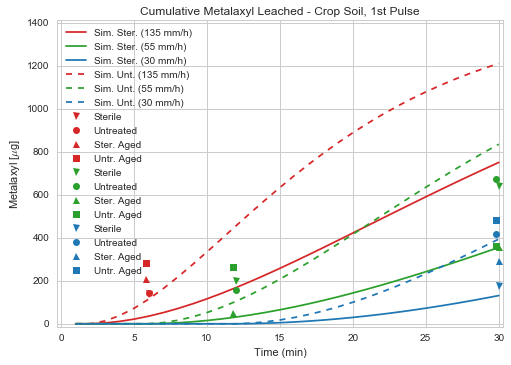

In [22]:
pestiplot_all(cum_leach_mx_crop, 
              leach1_high_6min, 
              leach1_med_12min, leach1_med_30min,
              leach1_low_30min,
              'Cumulative Metalaxyl Leached - Crop Soil, 1st Pulse',
              'Metalaxyl')

Uncomment the following line to see leaching rate for metalaxyl during the first pulse. 

In [23]:
# pestiplot_inst(cum_mx_crop, 
#               mx_obs_sterile_crop, mx_obs_untreat_crop, 
#               'Metalaxyl Leaching Rate - Annual Crop Soil')

### Metalaxyl - Crop Soil (2nd pulse)

** Initial mass in leachate - Crop Soil, 2nd Pulse**

In [24]:
# Initial mass - 2nd pulse
mx_ini_sterile_list = [1496.75, 1440.72, 1047.95, 1462.08, # 0 days
                       1127.52, 1267.11, 994.09, 1050.48] # 10 days

mx_ini_untreat_list = [1222.86, 1211.28, 751.13, 979.82,  # 0 days
                       1006.54, 1025.43, 938.23, 830.68]  # 10 days
                       
mx_ini_sterile = sum(mx_ini_sterile_list) / len(mx_ini_sterile_list)  
mx_ini_untreated = sum(mx_ini_untreat_list) / len(mx_ini_untreat_list)  


mx_ini2 = [mx_ini_sterile, mx_ini_untreated]

** Average observed mass in leachate and ponding - Crop Soil, 2nd Pulse**

In [25]:
# Observed Metalaxyl Leachate - Crop
# high, med-12, med-30, low
mx_obs_sterile_crop = np.array([(8.35 + 37.57) / 2.0,
                                (290.27) / 1.0, (93.29 + 82.15) / 2.0,
                                (285.29) / 1.0])

mx_obs_untreat_crop = np.array([(175.44 + 40.03) / 2.0,
                                (272.48 + 168.51) / 2.0, (35.12 + 146.10) / 2.0,
                                (86.01 + 76.49) / 2.0])

mx_sol_leach2 = [mx_obs_sterile_crop, mx_obs_untreat_crop]

# Observed Metalaxyl in Ponding - Crop
# high, med-12, med-30, low
mx_obs_sterile_crop_roff = np.array([(5.74 + 4.07) / 2.0,
                                     (9.16) / 1.0, (4.34 + 14.03) / 2.0,
                                     (12.42) / 1.0])

mx_obs_untreat_crop_roff = np.array([(4.72 + 3.17) / 2.0,
                                     (1.84) / 1.0, (8.90 + 0.14) / 2.0,
                                     (5.82 + 9.65) / 1.0])

mx_sol_pond2 = [mx_obs_sterile_crop_roff, mx_obs_untreat_crop_roff]

** Detailed observed mass in leachate and ponding - Crop Soil, 2nd Pulse**

In [26]:
# Organized individually:
# [sterile, untreat, sterile_aged, untreat_aged]
# all at 6 min, high inetnesity
leach2_mx_high_6min = np.array([8.35, 175.44, 37.57, 40.03])  

# all at 12 min, med intensity
leach2_mx_med_12min = np.array([290.27, 272.48, 0., 168.51]) 

# all at 30min, med intensity
leach2_mx_med_30min = np.array([93.29, 35.12, 82.15, 146.10])  

# all at 30min, low intensity
leach2_mx_low_30min = np.array([285.86, 86.01, 0., 76.49])  

# Organized individually:
# [sterile, untreat, sterile_aged, untreat_aged]
# all at 6 min, high inetnesity
roff2_mx_high_6min = np.array([5.7, 4.7, 4.1, 3.2])  

# all at 12 min, med intensity
roff2_mx_med_12min = np.array([0., 1.8, 9.2, 0.]) 

# all at 30min, med intensity
roff2_mx_med_30min = np.array([4.3, 8.9, 14.0, 0.1])  

# all at 30min, low intensity
roff2_mx_low_30min = np.array([0., 5.8, 12.4, 9.6])  

### Computation mass transfer - Metalaxyl, Crop, 2nd Pulse

In [27]:
# Any length unit input must be: "mm"
cum_mx_crop2 = pest_test(Kd_mexyl,
                         intensities,
                         pb_crop,
                         ovSat_crop,
                         percol_data2, runoff_data2, infil_data2, time_sizes2,
                         area, soil_height2, 
                         mx_ini2,
                         mx_sol_leach2, mx_sol_pond2,
                         d, runoff_vel, 
                         KFILM=True)

Best log Kd (sterile):  3.5633265629858064 ( Num:  1 ) 
 Error:  0.554438783841
Best log Kd (untreat):  3.5633265629858064 ( Num:  1 ) 
 Error:  0.780648274755


In [28]:
# Time axis
cum_time_30min = cum_mx_crop2[:, 0]

# Cumulative leachate sterilized
cum_mass_leach_st_135mmh = cum_mx_crop2[:, 1]
cum_mass_leach_st_55mmh = cum_mx_crop2[:, 2]
cum_mass_leach_st_30mmh = cum_mx_crop2[:, 3]

# Cumulative leachate untreated
cum_mass_leach_un_135mmh = cum_mx_crop2[:, 4]
cum_mass_leach_un_55mmh = cum_mx_crop2[:, 5]
cum_mass_leach_un_30mmh = cum_mx_crop2[:, 6]

# Leachate sterilized
mass_leach_st_135mmh = cum_mx_crop2[:, 7]
mass_leach_st_55mmh = cum_mx_crop2[:, 8]
mass_leach_st_30mmh = cum_mx_crop2[:, 9]

# Leachate untreated
mass_leach_un_135mmh = cum_mx_crop2[:, 10]
mass_leach_un_55mmh = cum_mx_crop2[:, 11]
mass_leach_un_30mmh = cum_mx_crop2[:, 12]

mass_percol2 = stackdata6(cum_time_30min,
        cum_mass_leach_st_135mmh, cum_mass_leach_st_55mmh, cum_mass_leach_st_30mmh,
        cum_mass_leach_un_135mmh, cum_mass_leach_un_55mmh, cum_mass_leach_un_30mmh)


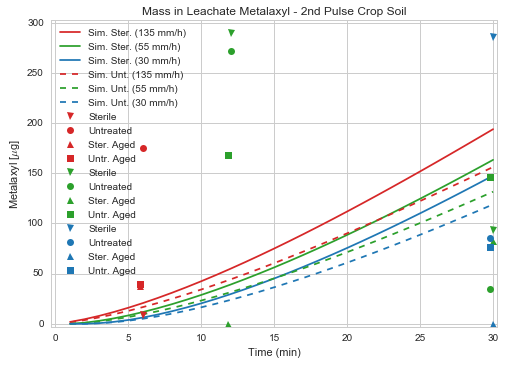

In [29]:
pestiplot_all(mass_percol2,
              leach2_mx_high_6min,
              leach2_mx_med_12min, leach2_mx_med_30min,
              leach2_mx_low_30min,
              'Mass in Leachate Metalaxyl - 2nd Pulse Crop Soil',
              'Metalaxyl')

** Ponding Mass ** 

In [30]:
# Ponding sterilized
mass_runoff_st_135mmh = cum_mx_crop2[:, 13]
mass_runoff_st_55mmh = cum_mx_crop2[:, 14]
mass_runoff_st_30mmh = cum_mx_crop2[:, 15]

# Ponding untreated
mass_runoff_un_135mmh = cum_mx_crop2[:, 16]
mass_runoff_un_55mmh = cum_mx_crop2[:, 17]
mass_runoff_un_30mmh = cum_mx_crop2[:, 18]

mass_overflow2 = stackdata6(cum_time_30min,
        mass_runoff_st_135mmh, mass_runoff_st_55mmh, mass_runoff_st_30mmh,
        mass_runoff_un_135mmh, mass_runoff_un_55mmh, mass_runoff_un_30mmh)

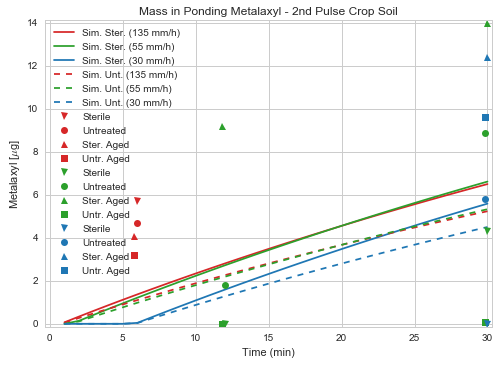

In [31]:
pestiplot_all(mass_overflow2,
              roff2_mx_high_6min,
              roff2_mx_med_12min, roff2_mx_med_30min,
              roff2_mx_low_30min,
              'Mass in Ponding Metalaxyl - 2nd Pulse Crop Soil',
              'Metalaxyl')

## S-metolachlor 

** Pesticide properties **

In [32]:
# Koc Ranges (EU COmmision SANCO/1426/2001 - rev. 3. 4 October 2004)
Koc_smeto = [369, 200, 110, 21]  # [ml/g]
Koc_smeto = np.array(Koc_smeto)*10**3

# Kd (S-metolachlor)
Kd_smeto_crop_sterile1 = Koc_smeto[0]*foc_crop_sterile  # ml/g
Kd_smeto_crop_untreat1 = Koc_smeto[0]*foc_crop_untreat
Kd_smeto_crop_sterile2 = Koc_smeto[1]*foc_crop_sterile  # ml/g
Kd_smeto_crop_untreat2 = Koc_smeto[1]*foc_crop_untreat 
Kd_smeto_crop_sterile3 = Koc_smeto[2]*foc_crop_sterile  # ml/g
Kd_smeto_crop_untreat3 = Koc_smeto[2]*foc_crop_untreat 
Kd_smeto_crop_sterile4 = Koc_smeto[3]*foc_crop_sterile  # ml/g
Kd_smeto_crop_untreat4 = Koc_smeto[3]*foc_crop_untreat 

Kd_smeto = [Kd_smeto_crop_sterile1, Kd_smeto_crop_untreat1, 
            Kd_smeto_crop_sterile2, Kd_smeto_crop_untreat2, 
            Kd_smeto_crop_sterile3, Kd_smeto_crop_untreat3, 
            Kd_smeto_crop_sterile4, Kd_smeto_crop_untreat4]

** Initial mass - Crop Soil, 1st Pulse**

In [33]:
# Initial mass, all intensities
mr_ini_sterile = (5176.9+4213.1)/float(2)  
mr_ini_untreated = (3460.8+2832.7)/float(2) 

mr_ini = [mr_ini_sterile, mr_ini_untreated]

#### Average observed mass - Crop, 1st and 2nd pulse

In [34]:
# 1st Pulse
# Leached Metolachlor (Observed) - Crop
# high-6, med-12, med-30, low-30
# 0d, 10d
mr_obs_sterile_crop = np.array([(65.7+77.7)/2.0,
                                (79.5+16.9)/2.0, 
                                (327.4+153.4)/2.0,
                                (70.9+110.7)/2.0])  
mr_obs_untreat_crop = np.array([(53.5+89.2)/2.0,
                                (49.4+70.5)/2.0, 
                                (281.7+116.4)/2.0,
                                (142.7+127.2)/2.0])

mr_sol_leach1 = [mr_obs_sterile_crop, mr_obs_untreat_crop]

# Ponded S-metolachlor ( Observed) - Crop
# high, med-12, med-30, low
mr_obs_sterile_crop_roff = np.array([0., 0., 0., 0.])

mr_obs_untreat_crop_roff = np.array([0., 0., 0., 0.])

mr_sol_pond1 = [mr_obs_sterile_crop_roff, mr_obs_untreat_crop_roff]


# Observed Metolachlor Leached - Crop
# high-6, med-12, med-30, low-30
# 0d, 10d
mr_obs_sterile_crop2 = np.array([(2.4+16.8)/2.0,
                                 82.5, 
                                 (37.9+24.3)/2.,
                                 102.7])
mr_obs_untreat_crop2 = np.array([(43.7+19.9)/2.,
                                 (66.8+37.9)/2., 
                                 (16.8+46.4)/2.,
                                 (22.7+16.7)/2.])

mr_sol_leach2 = [mr_obs_sterile_crop2, mr_obs_untreat_crop2]


# Observed S-metolachlor in Ponding - Crop
# high-6, med-12, med-30, low-30
# 0d, 10d
mr_obs_sterile_crop_roff2 = np.array([(1.9+1.1)/2.,
                                      3.4, 
                                      (2.4+8.6)/2.,
                                      5.0])

mr_obs_untreat_crop_roff2 = np.array([(1.4+0.4)/2.,
                                      0., 
                                      (5.6+1.4)/2.,
                                      (3.4+4.2)/2.])

mr_sol_pond2 = [mr_obs_sterile_crop_roff2, mr_obs_untreat_crop_roff2]

** Detailed observed mass in leachate and ponding - Crop Soil, 1st & 2nd Pulse**

In [35]:
# Organized individually:
# [sterile, untreat, sterile_aged, untreat_aged]
# all at 6 min, high inetnesity
leach1_mr_high_6min = np.array([65.7, 53.5, 77.7, 89.2 ])
leach2_mr_high_6min = np.array([2.4, 43.7, 16.8, 19.9])


# all at 12 min, med intensity
leach1_mr_med_12min = np.array([79.5, 49.4, 16.9, 70.5])
leach2_mr_med_12min = np.array([82.5, 66.8, 0.0, 37.9])

# all at 30min, med intensity
leach1_mr_med_30min = np.array([327.4, 281.7, 153.4, 116.4])
leach2_mr_med_30min = np.array([37.9, 16.8, 24.3, 46.4])

# all at 30min, low intensity
leach1_mr_low_30min = np.array([70.9, 142.7, 110.7, 127.2])
leach2_mr_low_30min = np.array([102.7, 22.7, 0., 16.7])

# Organized individually:
# [sterile, untreat, sterile_aged, untreat_aged]
# all at 6 min, high inetnesity

pond2_mr_high_6min = np.array([1.9, 1.4, 1.1, 0.4])

# all at 12 min, med intensity
pond2_mr_med_12min = np.array([0., 0., 3.4, 0.])

# all at 30min, med intensity
pond2_mr_med_30min = np.array([2.4, 5.6, 8.6, 1.4])

# all at 30min, low intensity
pond2_mr_low_30min = np.array([0., 3.4, 5.0, 4.2])

### Computation mass transfer - S-metolachlor, Crop, 1st Pulse

In [36]:
cum_mr_crop1 = pest_test(Kd_smeto,
                        intensities,
                        pb_crop,
                        ovSat_crop,
                        percol_data1, runoff_data1, infil_data1, time_sizes1,
                        area, soil_height, 
                        mr_ini,
                        mr_sol_leach1, mr_sol_pond1,
                        d, runoff_vel, 
                        KFILM=True)

Best log Kd (sterile):  3.918165324740909 ( Num:  1 ) 
 Error:  0.161552483651
Best log Kd (untreat):  3.918165324740909 ( Num:  1 ) 
 Error:  0.381905108244


In [37]:
# Time axis
cum_time_30min = cum_mr_crop1[:, 0]

# Cumulative leachate sterilized
cum_mass_leach_st_135mmh = cum_mr_crop1[:, 1]
cum_mass_leach_st_55mmh = cum_mr_crop1[:, 2]
cum_mass_leach_st_30mmh = cum_mr_crop1[:, 3]

# Cumulative leachate untreated
cum_mass_leach_un_135mmh = cum_mr_crop1[:, 4]
cum_mass_leach_un_55mmh = cum_mr_crop1[:, 5]
cum_mass_leach_un_30mmh = cum_mr_crop1[:, 6]

# Leachate sterilized
mass_leach_st_135mmh = cum_mr_crop1[:, 7]
mass_leach_st_55mmh = cum_mr_crop1[:, 8]
mass_leach_st_30mmh = cum_mr_crop1[:, 9]

# Leachate untreated
mass_leach_un_135mmh = cum_mr_crop1[:, 10]
mass_leach_un_55mmh = cum_mr_crop1[:, 11]
mass_leach_un_30mmh = cum_mr_crop1[:, 12]

mass_percol1 = stackdata6(cum_time_30min,
        cum_mass_leach_st_135mmh, cum_mass_leach_st_55mmh, cum_mass_leach_st_30mmh,
        cum_mass_leach_un_135mmh, cum_mass_leach_un_55mmh, cum_mass_leach_un_30mmh)

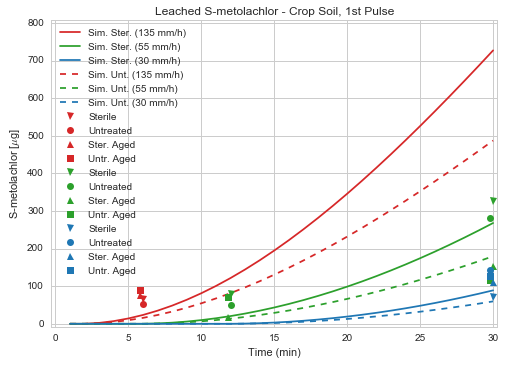

In [38]:
pestiplot_all(mass_percol1,
              leach1_mr_high_6min, leach1_mr_med_12min, leach1_mr_med_30min, leach1_mr_low_30min,
              'Leached S-metolachlor - Crop Soil, 1st Pulse',
              'S-metolachlor')

Uncomment the following line to see leaching rate for S-metolachlor during the first pulse. 

In [39]:
# pestiplot_inst(cum_mr_crop, 
#               mr_obs_sterile_crop, mr_obs_untreat_crop, 
#               'S-metolachlor Leaching Rate - Annual Crop Soil')

### Computation mass transfer - S-metolachlor, Crop, 2nd Pulse

In [40]:
cum_mr_crop2 = pest_test(Kd_smeto,
                        intensities,
                        pb_crop,
                        ovSat_crop,
                        percol_data2, runoff_data2, infil_data2, time_sizes2,
                        area, soil_height, 
                        mr_ini,
                        mr_sol_leach2, mr_sol_pond2,
                        d, runoffvelocity=runoff_vel, 
                        KFILM=True)

Best log Kd (sterile):  4.071605958573783 ( Num:  2 ) 
 Error:  0.467781156711
Best log Kd (untreat):  4.071605958573783 ( Num:  2 ) 
 Error:  0.917281199573


In [41]:
# Time axis
cum_time_30min = cum_mr_crop2[:, 0]

# Cumulative leachate sterilized
cum_mass_leach_st_135mmh = cum_mr_crop2[:, 1]
cum_mass_leach_st_55mmh = cum_mr_crop2[:, 2]
cum_mass_leach_st_30mmh = cum_mr_crop2[:, 3]

# Cumulative leachate untreated
cum_mass_leach_un_135mmh = cum_mr_crop2[:, 4]
cum_mass_leach_un_55mmh = cum_mr_crop2[:, 5]
cum_mass_leach_un_30mmh = cum_mr_crop2[:, 6]

# Leachate sterilized
mass_leach_st_135mmh = cum_mr_crop2[:, 7]
mass_leach_st_55mmh = cum_mr_crop2[:, 8]
mass_leach_st_30mmh = cum_mr_crop2[:, 9]

# Leachate untreated
mass_leach_un_135mmh = cum_mr_crop2[:, 10]
mass_leach_un_55mmh = cum_mr_crop2[:, 11]
mass_leach_un_30mmh = cum_mr_crop2[:, 12]

mass_percol2 = stackdata6(cum_time_30min,
        cum_mass_leach_st_135mmh, cum_mass_leach_st_55mmh, cum_mass_leach_st_30mmh,
        cum_mass_leach_un_135mmh, cum_mass_leach_un_55mmh, cum_mass_leach_un_30mmh)


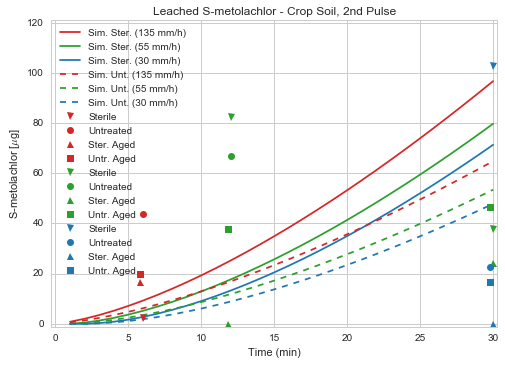

In [42]:
pestiplot_all(mass_percol2,
              leach2_mr_high_6min, leach2_mr_med_12min, leach2_mr_med_30min, leach2_mr_low_30min,
              'Leached S-metolachlor - Crop Soil, 2nd Pulse',
              'S-metolachlor')

In [43]:
# Ponded sterilized
mass_pond_st_135mmh = cum_mr_crop2[:, 13]
mass_pond_st_55mmh = cum_mr_crop2[:, 14]
mass_pond_st_30mmh = cum_mr_crop2[:, 15]

# Ponded untreated
mass_pond_un_135mmh = cum_mr_crop2[:, 16]
mass_pond_un_55mmh = cum_mr_crop2[:, 17]
mass_pond_un_30mmh = cum_mr_crop2[:, 18]

mass_pond2 = stackdata6(cum_time_30min,
        mass_pond_st_135mmh, mass_pond_st_55mmh, mass_pond_st_30mmh,
        mass_pond_un_135mmh, mass_pond_un_55mmh, mass_pond_un_30mmh)



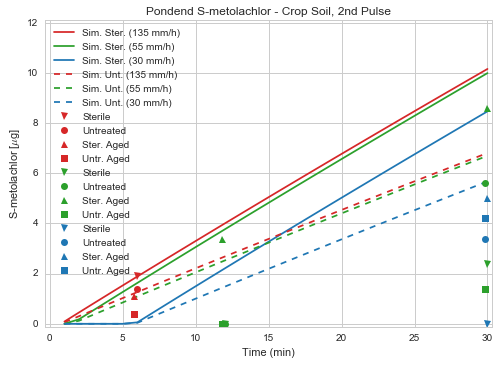

In [44]:
pestiplot_all(mass_pond2,
              pond2_mr_high_6min, pond2_mr_med_12min, pond2_mr_med_30min, pond2_mr_low_30min,
              'Pondend S-metolachlor - Crop Soil, 2nd Pulse',
              'S-metolachlor')

END NOTEBOOK

START NOTEBOOK

## Cupper

### Retardation model ($K_d$ - mean values)

Source: Allisson and Allison, 2005 (EPA/600/R-05/074)

| Metal (log $K_d$ [L/kg]$ | Soil/Water | Suspended Matter/ Water | Sediment/ Water | DOC/ Water |
|--------------------------|------------|-------------------------|-----------------|------------|
| Cu (mean)                | 2.7        | 4.7                     | 4.2             | 5.5        |
| Zn (mean)                | 3.1        | 5.1                     | 3.7             | 4.9        |

### Cupper - Crop (1st pulse)

** Pesticide properties **

In [45]:
# Kd (Copper). Allison and Allison, 2005 - EPA/600/R-05/074: 
# log(Kd) range: 0.1 - 7.0, max-mean = 5.5

Kd_copper1 = 10**0.1  # [mL/g] = [L/Kg] 
Kd_copper2 = 10**0.5  # [mL/g] = [L/Kg] 
Kd_copper3 = 10**0.6  # [mL/g] = [L/Kg] 
Kd_copper4 = 10**1.7  # [mL/g] = [L/Kg] 
Kd_copper5 = 10**2.7  # [mL/g] = [L/Kg]

Kd_copper = [Kd_copper1, Kd_copper2, Kd_copper3, Kd_copper4, Kd_copper5]
Kd_cupper = np.array(Kd_copper)*10**3

** Initial mass - Crop Soil, 1st Pulse **

In [46]:
# Initial mass
mass_ini_sterile = (1627 + 1107) / float(2)  # all intensities:{0d, 10d)
mass_ini_untreated = (1184 + 1177) / float(2)

cu_ini = [mass_ini_sterile, mass_ini_untreated]

** Average observed Cu mass - Crop soil, 1st and 2nd pulse. **

In [47]:
#################
# 1st Pulse
#################
# Leached Cupper (Observed) 
# 6min, 12min, 30min, 30min @ 135, 55, 55, 30mm/h
# 0d, 10d
cu_obs_sterile_lch1 = np.array([(8.6+14.0)/2.,
                                (9.2+14.)/2., (335.6+278.0)/2.,
                                (20.5+21.6)/2.])
cu_obs_untreat_lch1 = np.array([0.7,
                                0.4, (40+34)/2.,
                                (1.5+0.8)/2.])

cu_sol_leach1 = [cu_obs_sterile_lch1, cu_obs_untreat_lch1]

# Ponded Cupper ( Observed) - Crop
# high, med-12, med-30, low
cu_obs_sterile_crop_roff = np.array([0., 0., 0., 0.])

cu_obs_untreat_crop_roff = np.array([0., 0., 0., 0.])

cu_sol_pond1 = [cu_obs_sterile_crop_roff, cu_obs_untreat_crop_roff]

#################
# 2nd Pulse
#################
# Observed Cupper Leached - Crop
# high-6, med-12, med-30, low-30
# 0d, 10d
cu_obs_sterile_lch2 = np.array([(2.4+16.8)/2.0,
                                 82.5, 
                                 (37.9+24.3)/2.,
                                 102.7])
cu_obs_untreat_lch2 = np.array([(43.7+19.9)/2.,
                                 (66.8+37.9)/2., 
                                 (16.8+46.4)/2.,
                                 (22.7+16.7)/2.])

cu_sol_leach2 = [cu_obs_sterile_lch2, cu_obs_untreat_lch2]

# Observed Cupper in Ponding - Crop
# high-6, med-12, med-30, low-30
# 0d, 10d
cu_obs_sterile_crop_roff2 = np.array([(4.8+0.7/2.),
                                      0., (1.6+4.9)/2.,
                                      8.6])

cu_obs_untreat_crop_roff2 = np.array([0.6,
                                      0., 0.,
                                      0.])

cu_sol_pond2 = [cu_obs_sterile_crop_roff2, cu_obs_untreat_crop_roff2]


** Detailed observed mass in leachate and ponding - Crop Soil, 1st and 2nd pulse ** 

In [48]:
# Organized by intensity:
# [sterile, untreat, sterile_aged, untreat_aged]
# all at 6 min, high inetnesity
leach1_cu_high_6min = np.array([8.6, 0.7, 14.0, 0.])
leach2_cu_high_6min = np.array([4.8, 0.6, 0.7, 0.])


# all at 12 min, med intensity
leach1_cu_med_12min = np.array([9.2, 0.4, 14.0, 0.4])
leach2_cu_med_12min = np.array([6.4, 1.1, 0., 0.])

# all at 30min, med intensity
leach1_cu_med_30min = np.array([335.6, 40., 278.0, 34.0])
leach2_cu_med_30min = np.array([4.8, 0., 0.9, 0.])

# all at 30min, low intensity
leach1_cu_low_30min = np.array([20.5, 1.5, 21.6, 0.8])
leach2_cu_low_30min = np.array([8.6, 0.8, 0., 0.])

# Organized individually:
# [sterile, untreat, sterile_aged, untreat_aged]
# all at 6 min, high inetnesity

pond2_cu_high_6min = np.array([0., 0., 0., 0.])

# all at 12 min, med intensity
pond2_cu_med_12min = np.array([0., 0., 0., 0.])

# all at 30min, med intensity
pond2_cu_med_30min = np.array([1.6, 0., 4.9, 0.])

# all at 30min, low intensity
pond2_cu_low_30min = np.array([0., 0., 0., 0.])

In [49]:
cum_cu_crop1 = pest_test(Kd_cupper,
                              intensities,
                              pb_crop,
                              ovSat_crop,
                              percol_data1, runoff_data1, infil_data1, time_sizes1,
                              area, soil_height,
                              cu_ini,
                              cu_sol_leach1, cu_sol_pond1,
                              d, runoff_vel,
                              KFILM=True)

Best log Kd (sterile):  3.6 ( Num:  3 ) 
 Error:  0.15024566696
Best log Kd (untreat):  4.7 ( Num:  4 ) 
 Error:  0.475304747266


In [50]:
# Time axis
cum_time_30min = cum_cu_crop1[:, 0]

# Cumulative leachate sterilized
cum_mass_leach_st_135mmh = cum_cu_crop1[:, 1]
cum_mass_leach_st_55mmh = cum_cu_crop1[:, 2]
cum_mass_leach_st_30mmh = cum_cu_crop1[:, 3]

# Cumulative leachate untreated
cum_mass_leach_un_135mmh = cum_cu_crop1[:, 4]
cum_mass_leach_un_55mmh = cum_cu_crop1[:, 5]
cum_mass_leach_un_30mmh = cum_cu_crop1[:, 6]

# Leachate sterilized
mass_leach_st_135mmh = cum_cu_crop1[:, 7]
mass_leach_st_55mmh = cum_cu_crop1[:, 8]
mass_leach_st_30mmh = cum_cu_crop1[:, 9]

# Leachate untreated
mass_leach_un_135mmh = cum_cu_crop1[:, 10]
mass_leach_un_55mmh = cum_cu_crop1[:, 11]
mass_leach_un_30mmh = cum_cu_crop1[:, 12]

mass_percol1 = stackdata6(cum_time_30min,
        cum_mass_leach_st_135mmh, cum_mass_leach_st_55mmh, cum_mass_leach_st_30mmh,
        cum_mass_leach_un_135mmh, cum_mass_leach_un_55mmh, cum_mass_leach_un_30mmh)

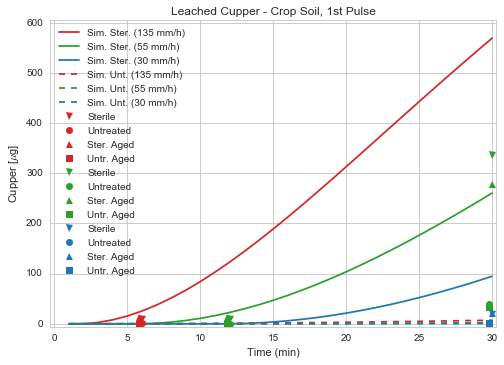

In [51]:
pestiplot_all(mass_percol1,
              leach1_cu_high_6min, leach1_cu_med_12min, leach1_cu_med_30min, leach1_cu_low_30min,
              'Leached Cupper - Crop Soil, 1st Pulse',
              'Cupper')

### Cupper, 2nd Pulse

In [58]:
cum_cu_crop2 = pest_test(Kd_smeto,
                        intensities,
                        pb_crop,
                        ovSat_crop,
                        percol_data2, runoff_data2, infil_data2, time_sizes2,
                        area, soil_height, 
                        cu_ini,
                        cu_sol_leach2, cu_sol_pond2,
                        d, runoff_vel, 
                        KFILM=True)


Best log Kd (sterile):  3.8056095880787035 ( Num:  4 ) 
 Error:  0.466838189546
Best log Kd (untreat):  3.918165324740909 ( Num:  1 ) 
 Error:  0.831648668388


In [59]:
# Time axis
cum_time_30min = cum_cu_crop2[:, 0]

# Cumulative leachate sterilized
cum_mass_leach_st_135mmh = cum_cu_crop2[:, 1]
cum_mass_leach_st_55mmh = cum_cu_crop2[:, 2]
cum_mass_leach_st_30mmh = cum_cu_crop2[:, 3]

# Cumulative leachate untreated
cum_mass_leach_un_135mmh = cum_cu_crop2[:, 4]
cum_mass_leach_un_55mmh = cum_cu_crop2[:, 5]
cum_mass_leach_un_30mmh = cum_cu_crop2[:, 6]

# Leachate sterilized
mass_leach_st_135mmh = cum_cu_crop2[:, 7]
mass_leach_st_55mmh = cum_cu_crop2[:, 8]
mass_leach_st_30mmh = cum_cu_crop2[:, 9]

# Leachate untreated
mass_leach_un_135mmh = cum_cu_crop2[:, 10]
mass_leach_un_55mmh = cum_cu_crop2[:, 11]
mass_leach_un_30mmh = cum_cu_crop2[:, 12]

mass_percol2 = stackdata6(cum_time_30min,
        cum_mass_leach_st_135mmh, cum_mass_leach_st_55mmh, cum_mass_leach_st_30mmh,
        cum_mass_leach_un_135mmh, cum_mass_leach_un_55mmh, cum_mass_leach_un_30mmh)

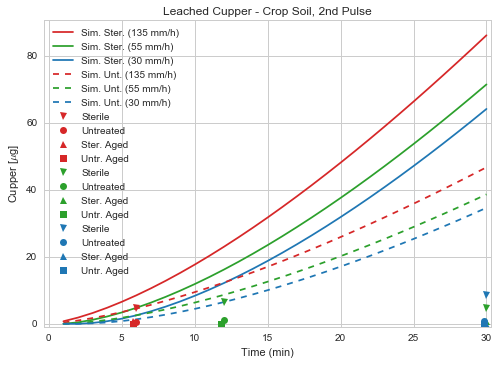

In [61]:
pestiplot_all(mass_percol2,
              leach2_cu_high_6min, leach2_cu_med_12min, leach2_cu_med_30min, leach2_cu_low_30min,
              'Leached Cupper - Crop Soil, 2nd Pulse',
              'Cupper')

In [62]:

# Ponded sterilized
mass_pond_st_135mmh = cum_cu_crop2[:, 13]
mass_pond_st_55mmh = cum_cu_crop2[:, 14]
mass_pond_st_30mmh = cum_cu_crop2[:, 15]

# Ponded untreated
mass_pond_un_135mmh = cum_cu_crop2[:, 16]
mass_pond_un_55mmh = cum_cu_crop2[:, 17]
mass_pond_un_30mmh = cum_cu_crop2[:, 18]

mass_pond2 = stackdata6(cum_time_30min,
        mass_pond_st_135mmh, mass_pond_st_55mmh, mass_pond_st_30mmh,
        mass_pond_un_135mmh, mass_pond_un_55mmh, mass_pond_un_30mmh)


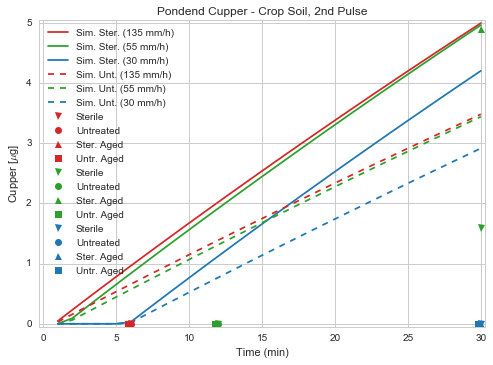

In [63]:
pestiplot_all(mass_pond2,
              pond2_cu_high_6min, pond2_cu_med_12min, pond2_cu_med_30min, pond2_cu_low_30min,
              'Pondend Cupper - Crop Soil, 2nd Pulse',
              'Cupper')

END NOTEBOOK

START NOTEBOOK


## Zinc

### Retardation model ($K_d$)

Source: Allisson and Allison, 2005 (EPA/600/R-05/074)

| Metal (log $K_d$ [L/kg]$ | Soil/Water | Suspended Matter/ Water | Sediment/ Water | DOC/ Water |
|--------------------------|------------|-------------------------|-----------------|------------|
| Cu (mean)                | 2.7        | 4.7                     | 4.2             | 5.5        |
| Zn (mean)                | 3.1        | 5.1                     | 3.7             | 4.9        |

### Zinc - Crop (1st pulse)

** Pesticide properties ** 

In [64]:
# Kd (Zinc) Allison and Allison, 2005 - EPA/600/R-05/074:  
# log(Kd) range: 1.5 - 6.9
Kd_zinc1 = 10**0.5  # [mL/g] = [L/Kg] 
Kd_zinc2 = 10**0.8
Kd_zinc3 = 10**1.0
Kd_zinc4 = 10**1.5

Kd_zinc = [Kd_zinc1, Kd_zinc2, Kd_zinc3, Kd_zinc4]
Kd_zinc = np.array(Kd_zinc)*10**3  # mm3/g

** Initial mass - Crop Soil, 1st Pulse **

In [53]:
mass_ini_sterile = (3106 + 2594) / float(2) 
mass_ini_untreated = (2636 + 2586) / float(2)

zn_ini = [mass_ini_sterile, mass_ini_untreated]

** Average observed Cu mass - Crop soil, 1st and 2nd pulse. **

In [65]:
#################
# 1st Pulse
#################
# Leached Zinc (Observed)
# 6min, 12min, 30min, 30min @ 135, 55, 55, 30mm/h
# 0d, 10d
zn_obs_sterile_lch1 = np.array([(16.8+16.7)/2.,
                                (17.7+16.3)/2., (523.4+285.1)/2.2,
                                (37.1+23.2)/2.])
zn_obs_untreat_lch1 = np.array([(0.9+3.5)/2.,
                                (0.8+3.2)/2., (17.2+56.5)/2.,
                                (1.7+4.5)/2.])

zn_sol_leach1 = [zn_obs_sterile_lch1, zn_obs_untreat_lch1]

# Ponded Zinc ( Observed) - Crop
# high, med-12, med-30, low
zn_obs_sterile_crop_roff = np.array([0., 0., 0., 0.])

zn_obs_untreat_crop_roff = np.array([0., 0., 0., 0.])

zn_sol_pond1 = [zn_obs_sterile_crop_roff, zn_obs_untreat_crop_roff]

#################
# 2nd Pulse
#################
# Observed Zinc Leached - Crop
# high-6, med-12, med-30, low-30
# 0d, 10d
zn_obs_sterile_lch2 = np.array([(2.5+0.4)/2.,
                                3.6, (1.3+0.2)/2.,
                                4.1])
zn_obs_untreat_lch2 = np.array([0.3,
                                1.0, 0.5,
                                0.])

zn_sol_leach2 = [zn_obs_sterile_lch2, zn_obs_untreat_lch2]

# Observed Zinc in Ponding - Crop
# high-6, med-12, med-30, low-30
# 0d, 10d
zn_obs_sterile_crop_roff2 = np.array([0.,
                                      0., (1.5+2.2)/2.,
                                      0.])

zn_obs_untreat_crop_roff2 = np.array([0.,
                                      0., 0.,
                                      0.])

zn_sol_pond2 = [zn_obs_sterile_crop_roff2, zn_obs_untreat_crop_roff2]


** Detailed observed mass in leachate and ponding - Crop Soil, 1st and 2nd pulse ** 

In [66]:
# Organized by intensity:
# [sterile, untreat, sterile_aged, untreat_aged]
# all at 6 min, high inetnesity
leach1_zn_high_6min = np.array([16.8, 0.8, 16.7, 3.5])
leach2_zn_high_6min = np.array([2.5, 0., 0.4, 0.3])


# all at 12 min, med intensity
leach1_zn_med_12min = np.array([17.7, 0.8, 16.3, 3.2])
leach2_zn_med_12min = np.array([3.6, 0., 0., 1.0])

# all at 30min, med intensity
leach1_zn_med_30min = np.array([523.4, 17.2, 285.1, 56.5])
leach2_zn_med_30min = np.array([1.3, 0., 0.2, 0.5])

# all at 30min, low intensity
leach1_zn_low_30min = np.array([37.1, 1.7, 23.2, 4.5])
leach2_zn_low_30min = np.array([4.1, 0., 0., 0.05])

# Organized individually:
# [sterile, untreat, sterile_aged, untreat_aged]
# all at 6 min, high inetnesity

pond2_zn_high_6min = np.array([0., 0., 0., 0.])

# all at 12 min, med intensity
pond2_zn_med_12min = np.array([0., 0., 0., 0.])

# all at 30min, med intensity
pond2_zn_med_30min = np.array([1.5, 0., 2.2, 0.])

# all at 30min, low intensity
pond2_zn_low_30min = np.array([0., 0., 0., 0.])


In [67]:
cum_zn_crop1 = pest_test(Kd_zinc,
                              intensities,
                              pb_crop,
                              ovSat_crop,
                              percol_data1, runoff_data1, infil_data1, time_sizes1,
                              area, soil_height,
                              zn_ini,
                              zn_sol_leach1, zn_sol_pond1,
                              d, runoff_vel,
                              KFILM=True)

Best log Kd (sterile):  3.8 ( Num:  2 ) 
 Error:  0.174296921412
Best log Kd (untreat):  4.5 ( Num:  4 ) 
 Error:  0.356597006105


In [68]:
# Time axis
cum_time_30min = cum_zn_crop1[:, 0]

# Cumulative leachate sterilized
cum_mass_leach_st_135mmh = cum_zn_crop1[:, 1]
cum_mass_leach_st_55mmh = cum_zn_crop1[:, 2]
cum_mass_leach_st_30mmh = cum_zn_crop1[:, 3]

# Cumulative leachate untreated
cum_mass_leach_un_135mmh = cum_zn_crop1[:, 4]
cum_mass_leach_un_55mmh = cum_zn_crop1[:, 5]
cum_mass_leach_un_30mmh = cum_zn_crop1[:, 6]

# Leachate sterilized
mass_leach_st_135mmh = cum_zn_crop1[:, 7]
mass_leach_st_55mmh = cum_zn_crop1[:, 8]
mass_leach_st_30mmh = cum_zn_crop1[:, 9]

# Leachate untreated
mass_leach_un_135mmh = cum_zn_crop1[:, 10]
mass_leach_un_55mmh = cum_zn_crop1[:, 11]
mass_leach_un_30mmh = cum_zn_crop1[:, 12]

mass_percol1 = stackdata6(cum_time_30min,
        cum_mass_leach_st_135mmh, cum_mass_leach_st_55mmh, cum_mass_leach_st_30mmh,
        cum_mass_leach_un_135mmh, cum_mass_leach_un_55mmh, cum_mass_leach_un_30mmh)

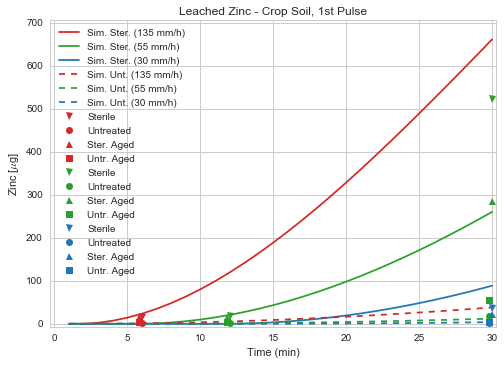

In [69]:
pestiplot_all(mass_percol1,
              leach1_zn_high_6min, leach1_zn_med_12min, leach1_zn_med_30min, leach1_zn_low_30min,
              'Leached Zinc - Crop Soil, 1st Pulse',
              'Zinc')

### Zinc, 2nd Pulse

In [70]:
cum_zn_crop2 = pest_test(Kd_zinc,
                        intensities,
                        pb_crop,
                        ovSat_crop,
                        percol_data2, runoff_data2, infil_data2, time_sizes2,
                        area, soil_height, 
                        zn_ini,
                        zn_sol_leach2, zn_sol_pond2,
                        d, runoff_vel, 
                        KFILM=True)


Best log Kd (sterile):  4.5 ( Num:  4 ) 
 Error:  1.12973907071
Best log Kd (untreat):  4.5 ( Num:  4 ) 
 Error:  4.52355410316


In [71]:
# Time axis
cum_time_30min = cum_zn_crop2[:, 0]

# Cumulative leachate sterilized
cum_mass_leach_st_135mmh = cum_zn_crop2[:, 1]
cum_mass_leach_st_55mmh = cum_zn_crop2[:, 2]
cum_mass_leach_st_30mmh = cum_zn_crop2[:, 3]

# Cumulative leachate untreated
cum_mass_leach_un_135mmh = cum_zn_crop2[:, 4]
cum_mass_leach_un_55mmh = cum_zn_crop2[:, 5]
cum_mass_leach_un_30mmh = cum_zn_crop2[:, 6]

# Leachate sterilized
mass_leach_st_135mmh = cum_zn_crop2[:, 7]
mass_leach_st_55mmh = cum_zn_crop2[:, 8]
mass_leach_st_30mmh = cum_zn_crop2[:, 9]

# Leachate untreated
mass_leach_un_135mmh = cum_zn_crop2[:, 10]
mass_leach_un_55mmh = cum_zn_crop2[:, 11]
mass_leach_un_30mmh = cum_zn_crop2[:, 12]

mass_percol2 = stackdata6(cum_time_30min,
        cum_mass_leach_st_135mmh, cum_mass_leach_st_55mmh, cum_mass_leach_st_30mmh,
        cum_mass_leach_un_135mmh, cum_mass_leach_un_55mmh, cum_mass_leach_un_30mmh)

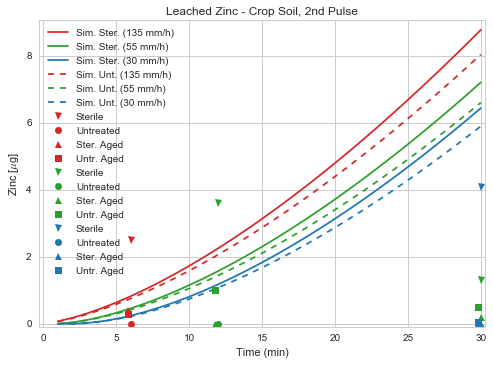

In [72]:
pestiplot_all(mass_percol2,
              leach2_zn_high_6min, leach2_zn_med_12min, leach2_zn_med_30min, leach2_zn_low_30min,
              'Leached Zinc - Crop Soil, 2nd Pulse',
              'Zinc')

In [73]:
# Ponded sterilized
mass_pond_st_135mmh = cum_zn_crop2[:, 13]
mass_pond_st_55mmh = cum_zn_crop2[:, 14]
mass_pond_st_30mmh = cum_zn_crop2[:, 15]

# Ponded untreated
mass_pond_un_135mmh = cum_zn_crop2[:, 16]
mass_pond_un_55mmh = cum_zn_crop2[:, 17]
mass_pond_un_30mmh = cum_zn_crop2[:, 18]

mass_pond2 = stackdata6(cum_time_30min,
        mass_pond_st_135mmh, mass_pond_st_55mmh, mass_pond_st_30mmh,
        mass_pond_un_135mmh, mass_pond_un_55mmh, mass_pond_un_30mmh)

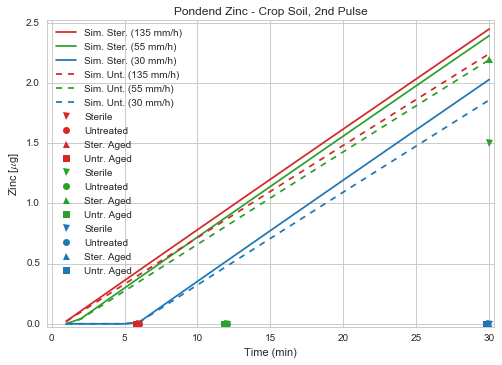

In [74]:
pestiplot_all(mass_pond2,
              pond2_zn_high_6min, pond2_zn_med_12min, pond2_zn_med_30min, pond2_zn_low_30min,
              'Pondend Zinc - Crop Soil, 2nd Pulse',
              'Zinc')

END NOTEBOOK